<h1><center>Analysis of Onion Market Dynamics</center></h1>
<p><center>By Amaan Makandar and Keith Lee</center><p>
<hr>

# Introduction

Agriculture remains a cornerstone of global economies, providing essential resources such as food, raw materials, and employment. In particular, the production and pricing of agricultural commodities, like onions, are critical to the stability of food markets and the livelihoods of farmers and consumers. Understanding and predicting the fluctuations in the supply and prices of such commodities are vital for policymakers, traders, and stakeholders of onions within the agricultural sector to maximize benefit.

Onions, a staple ingredient in cuisines worldwide, have seen volatile price movements, often influenced by factors such as weather conditions, pest outbreaks, and market demand. This volatility can have far-reaching consequences, affecting everything from the economic well-being of farmers to the cost of living for consumers. Analyzing the time series data of onion prices is essential for developing strategies to maximize cost efficiency when buying and selling onions.

Data science techniques offer robust tools for analyzing complex data patterns, making accurate forecasts, and deriving actionable insights. By leveraging time series analysis, machine learning, and predictive modeling, we can uncover trends and anomalies within the agricultural market data that would be difficult to detect through traditional methods.

# Data Collection

For this analysis, we are utilizing the Onion Time Series Dataset obtained from Kaggle, which can be accessed via [this link](https://www.kaggle.com/datasets/chopper53/onion-time-series-dataset?resource=download). The dataset aims to provide insights into onion market dynamics, including trends in arrivals, pricing variations, and modal price trends over time. We can utilize this dataset to analyze market behavior, assess pricing patterns, and identify factors influencing onion pricing fluctuations.

The dataset includes the following features:
- **Commodity**: Type of commodity, with a focus on onions.
- **Date**: Date of observation for the onion market data.
- **Arrivals in Qtls.**: Quantity of onions arriving in the market, measured in quintals (Qtls.).
- **Min**: Minimum price observed for onions on the given date.
- **Max**: Maximum price observed for onions on the given date.
- **Modal**: Modal price of onions, representing the most frequently occurring price range.

<b>Imports</b>

In [182]:
import pandas as pd
pd.options.mode.chained_assignment = None # disable annoying error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Libraries and Tools Used

**Pandas**: A powerful data manipulation and analysis library for Python. It provides data structures like DataFrames, which are essential for handling and analyzing structured data efficiently. In this project, Pandas will be used to load, clean, and preprocess the Onion Time Series Dataset.

**NumPy**: A fundamental package for numerical computing in Python. It supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. NumPy will be utilized for various numerical operations and handling missing data.

**Matplotlib**: A plotting library for creating static, interactive, and animated visualizations in Python. Matplotlib will be used to generate plots and graphs that help visualize trends, patterns, and distributions in the onion market data.

**Seaborn**: A statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn will be used to create more sophisticated and aesthetically pleasing plots for the dataset analysis.

**seasonal_decompose**: A function from the Statsmodels library that performs seasonal decomposition of time series data. It separates the data into trend, seasonal, and residual components. This will be crucial for understanding the underlying patterns and seasonal effects in onion prices.

**adfuller**: The Augmented Dickey-Fuller test, available in the Statsmodels library, is used to check for stationarity in time series data. Stationarity is a key assumption in many time series forecasting methods. The ADF test will help determine whether the onion price data is stationary or if differencing is required to make it stationary.

### Reading in the Data

In [183]:
global_df = pd.read_csv('onion_timeseries_data.csv')

# Display the first few rows of the DataFrame
print(global_df.head(), '\n')

# Check the data types of each column
print(global_df.dtypes)

  Commodity        Date  Arrivals in Qtls.   Min   Max  Modal
0     ONION   5/12/2015             158796   439  1538   1046
1     ONION    8/2/2015              37413  1789  3808   3054
2     ONION  10/23/2015              45384  1122  3035   2273
3     ONION   1/13/2016             271679   547  1468   1147
4     ONION   3/10/2016             261306   408   871    704 

Commodity            object
Date                 object
Arrivals in Qtls.     int64
Min                   int64
Max                   int64
Modal                 int64
dtype: object


# Data Processing

In [184]:
# Commodity column is not needed, it is always Onion
df = global_df.drop(columns=['Commodity'])

# Update column names for ease of use
df.columns = ['date', 'quantity', 'min', 'max', 'modal']

# Segmenting date to hold data >= 2015
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] >= '2015-01-01']
df = df.sort_values(by='date')

# Add a column for the day of the week and month
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Set date to index
df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

            quantity  min   max  modal  day_of_week  month
date                                                      
2015-01-01    192433  633  1563   1126            3      1
2015-01-02    183317  612  1568   1147            4      1
2015-01-03    107223  476  1662   1140            5      1
2015-01-04     40997  545  1687   1125            6      1
2015-01-05    238692  560  1646   1211            0      1


# Exploratory Analysis & Data Visualization

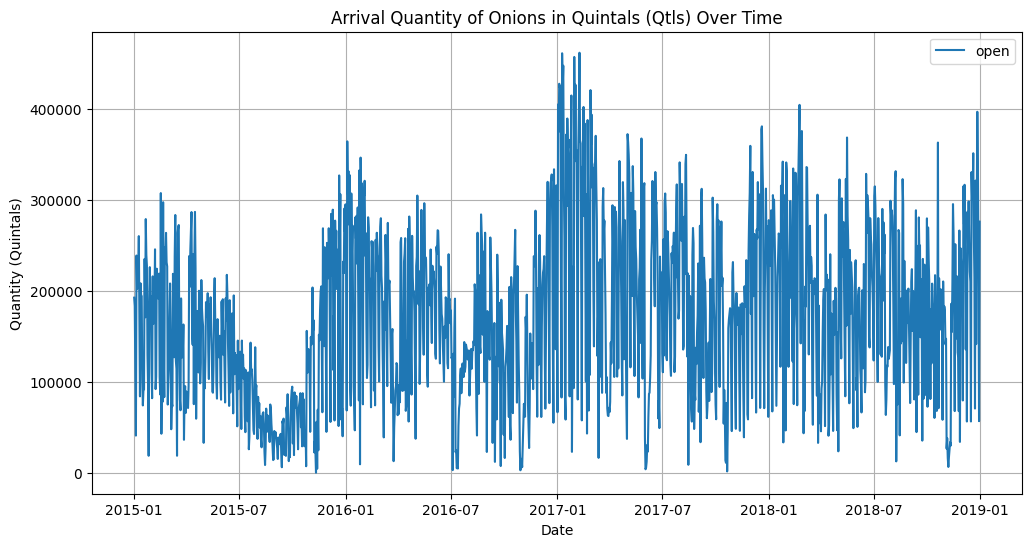

In [185]:
# Plotting Quantity
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['quantity'], label='open')
plt.title('Arrival Quantity of Onions in Quintals (Qtls) Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (Quintals)')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe that the arrival quantity of onions in Quintals (Qtls) exhibits high volatility and lacks discernible seasonal patterns. The significant fluctuations make it challenging to identify any anomalies with confidence. Moreover, there does not appear to be a noticeable trend in the arrival quantities over time. This high level of volatility suggests that the market may influenced by various unpredictable factors, making it difficult to draw clear conclusions about underlying patterns or trends.

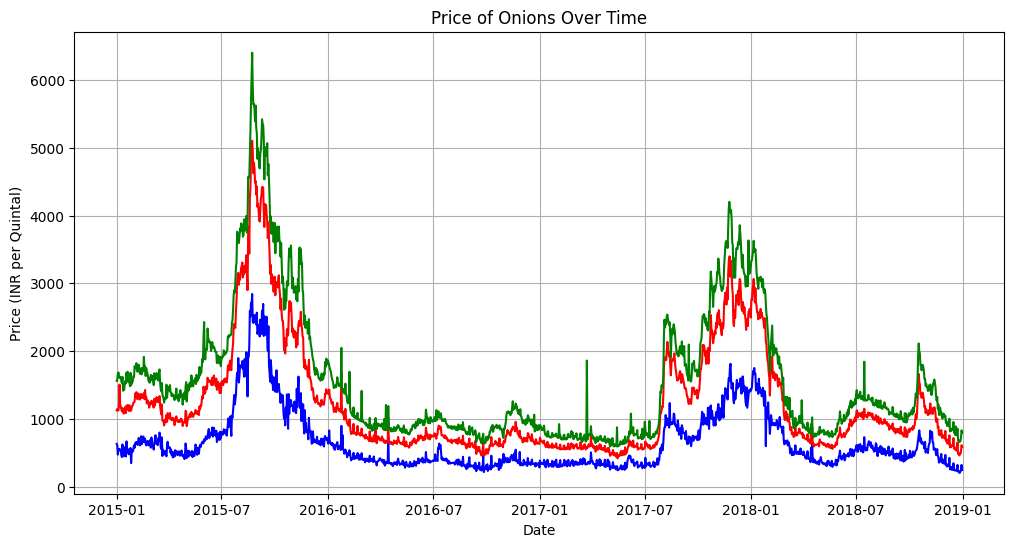

In [186]:
# Plotting min, max, and modal
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['min'], color='blue')
plt.plot(df.index, df['modal'], color='red')
plt.plot(df.index, df['max'], color='green')
plt.title('Price of Onions Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR per Quintal)')
plt.grid(True)
plt.show()


The graph illustrating the minimum, maximum, and modal prices of onions over time provides a comprehensive view of the price fluctuations in the market. The blue line represents the minimum price, the red line denotes the modal price, and the green line shows the maximum price. It seems that prices are typically higher at the latter half of the year and that there were major spikes in price in the latter half of 2015 and 2017. 

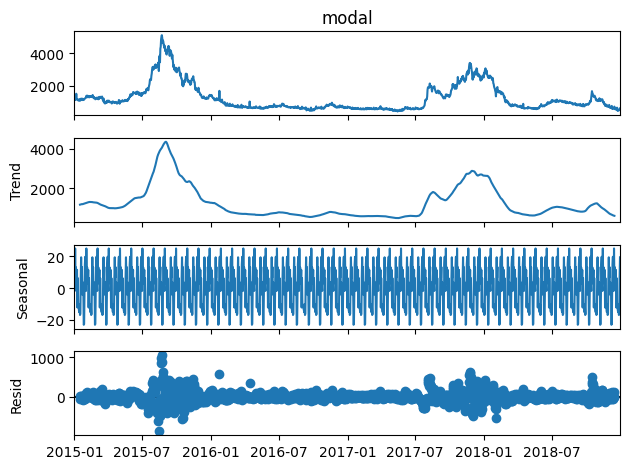

In [187]:
# Decomposition
result = seasonal_decompose(df['modal'], model='additive', period=30)
result.plot()
plt.show()

The trend component reveals the long-term movement in onion prices, showing significant peaks around mid-2015 and mid-2017. Following these peaks, the trend generally shows a gradual decline with some fluctuations, stabilizing towards the end of the period.
<br><br>
The seasonal component reveals a repeating pattern with a periodicity of approximately one year. This consistent cyclic behavior highlights the seasonal nature of onion prices. The seasonal peaks and troughs indicate higher prices during certain months and lower prices during others, likely corresponding to the agricultural cycle of planting and harvesting onions. 
<br><br>
There is notable volatility in the residuals, especially around mid-2015, suggesting the presence of unexpected events or anomalies during this period.

# Analysis, Hypothesis Testing, & Machine Learning

Out of the dataset features, the modal price appears to be the most important feature because it is the price range at which most onion sales are made. Features such as max price, min price, and quantity sold are subject to extreme outliers and can fluctuate based on a variety of external conditions.

We will explore relationships between each of our dataset features and create a multivariable linear regression to predict the future modal prices in the onion market.

In [188]:
# Stationarity test
adf_test = adfuller(df['modal'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -2.7362774649980697
p-value: 0.0679682937132193


Based on the ADF test results, with a p-value of 0.068, we fail to reject the null hypothesis that the modal price time series is non-stationary. This implies that the time series may indeed be non-stationary, meaning its statistical properties change over time.

It makes sense that markets for agricultural commodities, such as onions, are non-stationary because the volume of trading highly depends on the growth and harvest seasons for the commodity itself. The box plot for monthly onion prices shows higher onion prices in the latter half of the year, highlighting seasonal fluctuations in the onion market.

To further explore how the price of onions changes based on the season, we will create a box plot of modal onion prices for each month of the year. Onion prices will typically be higher outside of their harvest season due to a lack of supply.

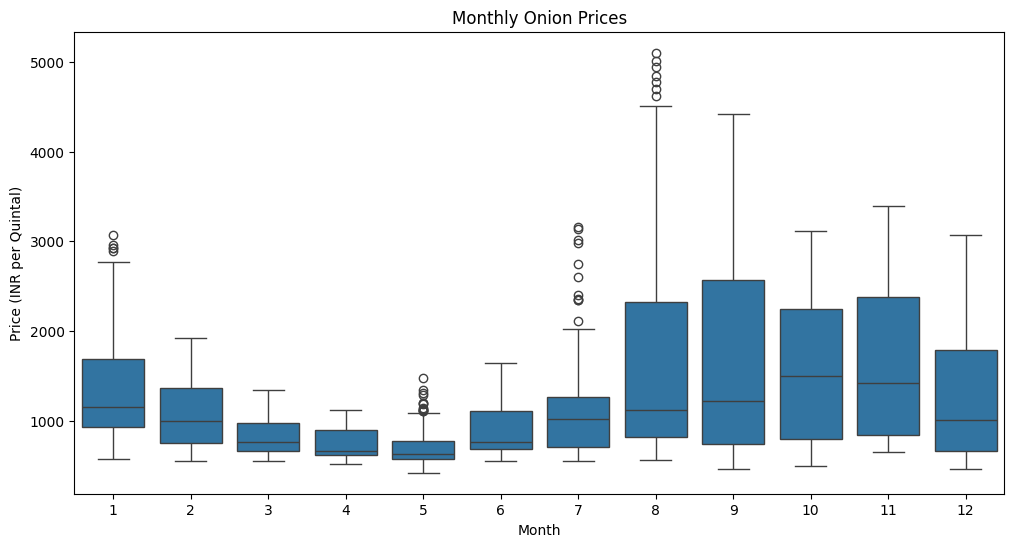

In [189]:
# Box plot to show modal price in each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='modal', data=df)
plt.xlabel('Month')
plt.ylabel('Price (INR per Quintal)')
plt.title('Monthly Onion Prices')
plt.show()

The boxplot shows the modal price of a quintal of onions in each month. This boxplot confirms the notion from the graph for onion prices over time that onion prices are typically higher in the latter half of the year. It also seems like the median price of Onions oscillates around 1,000 INR througout the year.

Modal onion price also doesn't seem to display a linear relationship with the month of sale, but there is a visible relationship. This means that while the current month may not be usable in a linear regression to predict modal price, a higher order regression may be able to exploit it to increase its accuracy.

We should also check whether any of the other features in the dataset have a linear relationship with the modal price.

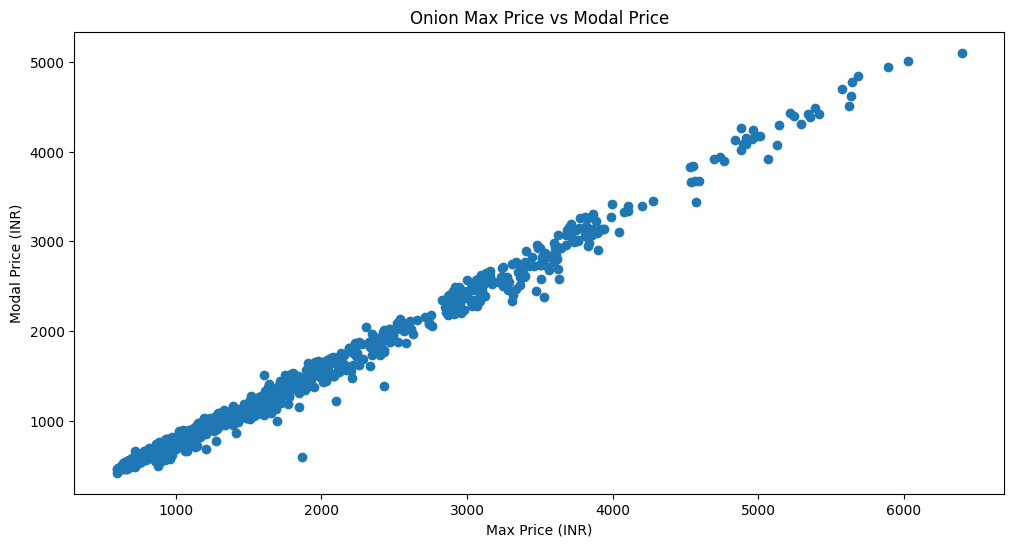

In [190]:
# scatter plots of onion prices vs month
plt.figure(figsize=(12,6))
plt.scatter(df['max'] , df['modal'])
plt.xlabel("Max Price (INR)")
plt.ylabel("Modal Price (INR)")
plt.title("Onion Max Price vs Modal Price")
plt.show()

Onion max price appears to have a very clear linear relationship with the modal price, so we will use it as a feature.

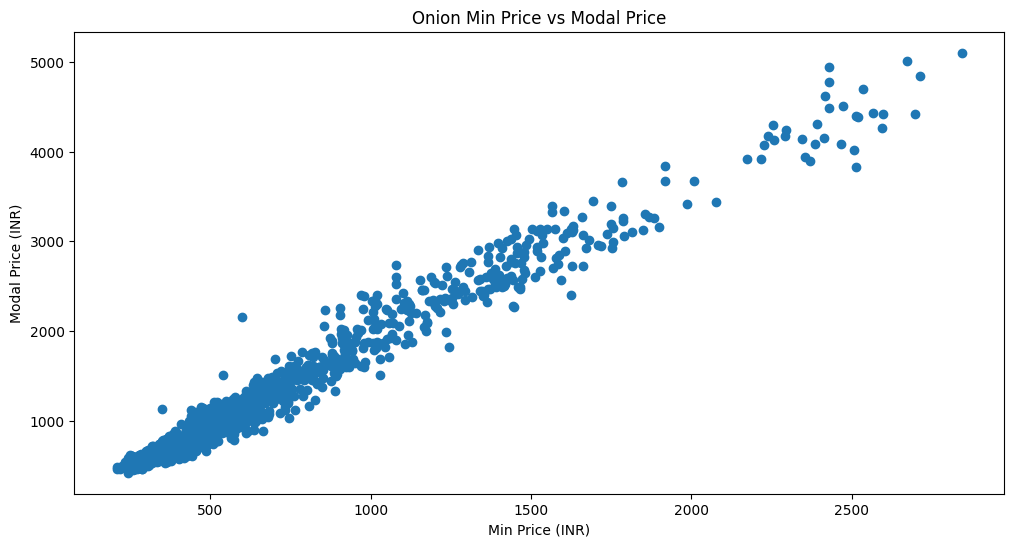

In [191]:
# scatter plots of onion prices vs month
plt.figure(figsize=(12,6))
plt.scatter(df['min'] , df['modal'])
plt.xlabel("Min Price (INR)")
plt.ylabel("Modal Price (INR)")
plt.title("Onion Min Price vs Modal Price")
plt.show()

Onion min price also appears to have a generally linear relationship with modal price, so we will include it in our regression model.

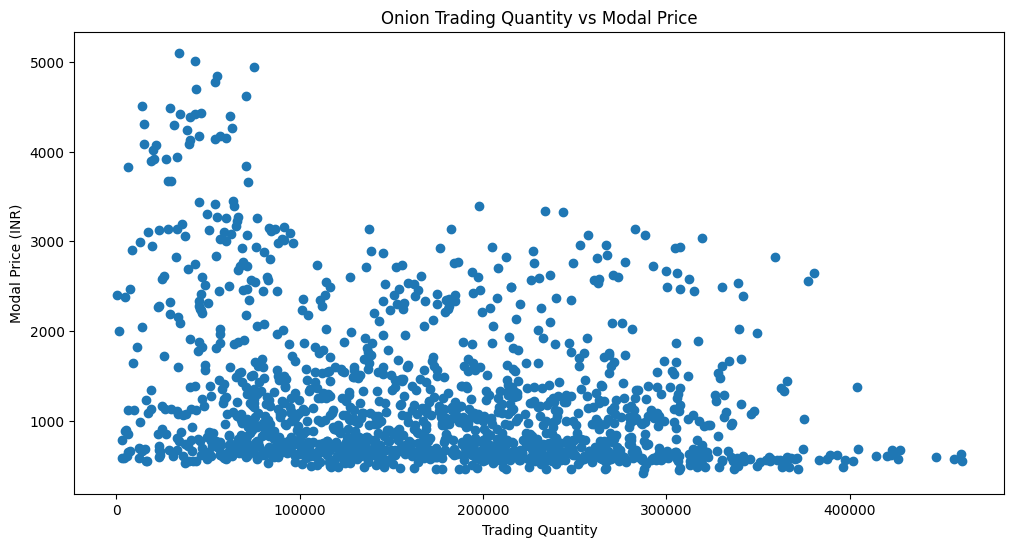

In [192]:
# scatter plots of onion prices vs month
plt.figure(figsize=(12,6))
plt.scatter(df['quantity'] , df['modal'])
plt.xlabel("Trading Quantity")
plt.ylabel("Modal Price (INR)")
plt.title("Onion Trading Quantity vs Modal Price")
plt.show()

Unlike the other features, there does not appear to be a relationship between trading quantity and modal price. This can be explained due to a number of external factors, such as weather or quantity of customers.

Since trading quantity doesn't seem to affect the actual modal price, we will not use it in our regression model.

Overall, we will use month, minimum price, and maximum price as features in our regression model to predict the modal price.

To find the correct weights for our multilinear regression, we will use gradient descent. Gradient descent works by minimizing the error between the predicted and actual data values.

Mathematically, we are trying to find
$$\theta \in \mathbb{R}^{n}$$
that minimizes the squared loss
$$\frac{1}{2}\sum_{i=1}^{m} (\theta \cdot X_{i} - y_{i}) = \frac{1}{2}||X\theta - y||^{2}$$

Here are what each of the variables mean:
- $n$ : number of features used in the regression
- $m$ : size of the training dataset
- $X$ : the training dataset itself
- $y$ : the actual truth values corresponding to the training dataset

In order to minimize the squared loss, we change the vector $\theta$ in the direction that decreases the squared loss the most, which is the gradient of the loss function. Using the chain rule and usual derivative rules, we obtain that
$$\nabla_{\theta}\frac{1}{2}||X\theta - y||^{2} = X^{T}(X\theta - y)$$
At each step of the gradient descent algorithm, we update $\theta$ by
$$\theta \leftarrow \theta - \alpha \cdot X^{T}(X\theta - y)$$
where $\alpha$ is a preset learning rate that scales how the weights change per iteration.

The code we use to calculate gradient descent is given below. Note that in addition to the regression's weights, we also return an array of the squared losses for each epoch, or training step, of the algorithm.

In [193]:
# X = training data
# y = validation data
# timesteps = number of timesteps to train linear regression
# learning_rate = learning rate of gradient descent algorithm
def grad_descent(X, y, timesteps, alpha):
    # m = training data size, n = number of features
    m, n = X.shape
    # regression weights
    theta = np.zeros(n)
    loss = np.zeros(timesteps)

    for i in range(timesteps):
        loss[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        
        g = np.transpose(X).dot(X.dot(theta) - y)
        theta = theta - alpha * g
    
    return theta, loss

The problem with directly using each of our features to train the linear regression is that each feature's data exists in a different range to the other features. For example, the numerical month consists of data from the interval $[1,12]$, but other features like max price exist over a much larger range that extends into the thousands. This can cause the regression model to assign more importance to the larger features and ignore smaller ones. Additionally, larger features can cause numerical overflow problems that affect the convergence of the gradient descent algorithm.

To combat this, we will normalize each of the features to the $[0,1]$ range using the formula
$$x \leftarrow \frac{x - min_{feature}}{max_{feature} - min_{feature}}$$
where
- $x$ : feature
- $min_{feature}$ : min data value of feature
- $max_{feature}$ : max data value of feature

In addition to normalizing data, the code below also adds a bias weight to the regression with a default value of 1.

In [194]:
def get_normalized_split(data):
    # normalize data to [0,1] range
    mins = data.min()
    maxs = data.max()

    data['min'] = (data['min'] - mins['min']) / (maxs['min'] - mins['min'])
    data['max'] = (data['max'] - mins['max']) / (maxs['max'] - mins['max'])
    data['month'] = (data['month'] - 1) / (12 - 1)

    # use month, min price, and max price as features
    X = data[['month', 'min', 'max']].values
    y = data['modal'].values
    
    # add bias to data
    X = np.column_stack((np.ones(len(X)), X))

    return X, y

There are a number of techniques we could use to validate whether our model is actually decent at predicting the modal onion price. While using the usual train-test split is possible, it is harder to gauge whether the model is a good general regression or overfit on the training data.

Instead, we will use a technique called K-fold Cross Validation. This technique works by splitting the data set into groups and using each of them as a test set. We train a model on the rest of the data set and collect accuracy metrics for the test set. Afterwards, we aggregate all of the metrics together to create a more general evaluation score for the model.

Based on the size of the dataset, we chose $k = 10$ as our cross validation test set size.

In [195]:
# shuffle data set before partitioning
indexed_df = df.reset_index().sample(frac=1)
k_fold_size = 10
k_fold_iterations = (len(df) // k_fold_size)
mse = []
loss_example = []

# model parameters
timesteps = 1000
learning_rate = 0.0005

# add extra iteration for leftover data from grouping data
if len(df) % k_fold_size != 0:
    k_fold_iterations += 1

for i in range(k_fold_iterations):
    # cut group from dataframe for testing and use rest as training set
    # track eval metrics (MSE, loss, etc.)
    starting_idx = i * k_fold_size
    ending_idx = min(len(df), starting_idx + k_fold_size)
    test_df = indexed_df.iloc[starting_idx:ending_idx]
    train_df = indexed_df.drop(index=[i for i in range(starting_idx, ending_idx)])
    
    # normalize df and add biases
    X_train, y_train = get_normalized_split(train_df)
    X_test, y_test = get_normalized_split(test_df)

    # train model on the dataframe
    weights, loss = grad_descent(X_train, y_train, timesteps, learning_rate)
    loss_example = loss

    # calculate MSE
    predictions = np.dot(X_test, weights)
    error = np.mean((predictions - y_test)**2)
    mse.append(error)

In [196]:
print(f"Average MSE over Cross-Validation Iterations: {np.mean(mse)}")
print(f"Maximum MSE over Cross-Validation Iterations: {np.max(mse)}")
print(f"Minimum MSE over Cross-Validation Iterations: {np.min(mse)}")

Average MSE over Cross-Validation Iterations: 1348486.5460915621
Maximum MSE over Cross-Validation Iterations: 5108587.90094454
Minimum MSE over Cross-Validation Iterations: 6248.78258925893


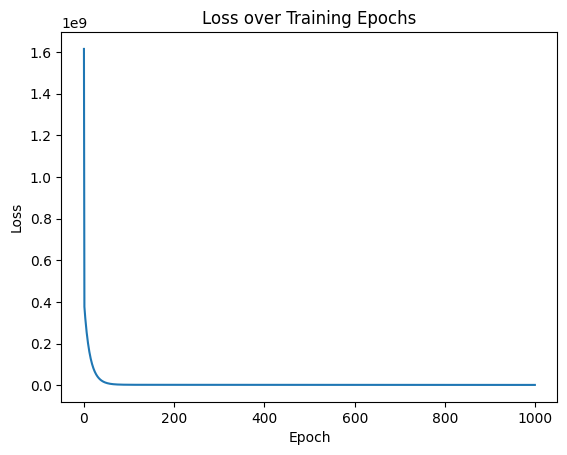

In [197]:
plt.plot(range(timesteps), loss_example)
plt.title("Loss over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [198]:

def ridge_regression_grad_descent(X, y, timesteps, alpha, lam):
    m, n = X.shape
    theta = np.zeros(n)
    loss = np.zeros(timesteps)
    mask = np.array([lam] * n)
    mask[0] = 0

    for i in range(timesteps):
        loss[i] = 0.5 * np.mean((X.dot(theta) - y)**2)
        g = (2 / m) * np.transpose(X).dot(X.dot(theta) - y) + 2 * mask * theta
        theta = theta - alpha * g
    
    return theta, loss

In [199]:
def get_normalized_ridge_split(data):
    # normalize data to [0,1] range
    mins = data.min()
    maxs = data.max()

    data['min'] = (data['min'] - mins['min']) / (maxs['min'] - mins['min'])
    data['max'] = (data['max'] - mins['max']) / (maxs['max'] - mins['max'])
    data['month'] = (data['month'] - 1) / (12 - 1)

    # use month, min price, and max price as features
    X = data[['month', 'min', 'max']].values
    y = data['modal'].values
    
    # add quadratic features and bias
    X = np.column_stack((X, np.square(X)))
    X = np.column_stack((np.ones(len(X)), X))

    return X, y

In [200]:
mse = []
loss_example = []

# model parameters
timesteps = 1000
learning_rate = 0.0005
lam = 10

for i in range(k_fold_iterations):
    # cut group from dataframe for testing and use rest as training set
    # track eval metrics (MSE, loss, etc.)
    starting_idx = i * k_fold_size
    ending_idx = min(len(df), starting_idx + k_fold_size)
    test_df = indexed_df.iloc[starting_idx:ending_idx]
    train_df = indexed_df.drop(index=[i for i in range(starting_idx, ending_idx)])
    
    # normalize df and add biases
    X_train, y_train = get_normalized_ridge_split(train_df)
    X_test, y_test = get_normalized_ridge_split(test_df)

    weights, loss = ridge_regression_grad_descent(X_train, y_train, timesteps, learning_rate, 10)
    loss_example = loss

    predictions = np.dot(X_test, weights)
    error = np.mean((predictions - y_test)**2)
    mse.append(error)

In [201]:
print(f"Average MSE over Cross-Validation Iterations: {np.mean(mse)}")
print(f"Maximum MSE over Cross-Validation Iterations: {np.max(mse)}")
print(f"Minimum MSE over Cross-Validation Iterations: {np.min(mse)}")

Average MSE over Cross-Validation Iterations: 847984.1727481061
Maximum MSE over Cross-Validation Iterations: 3132487.020926472
Minimum MSE over Cross-Validation Iterations: 19579.04941863592


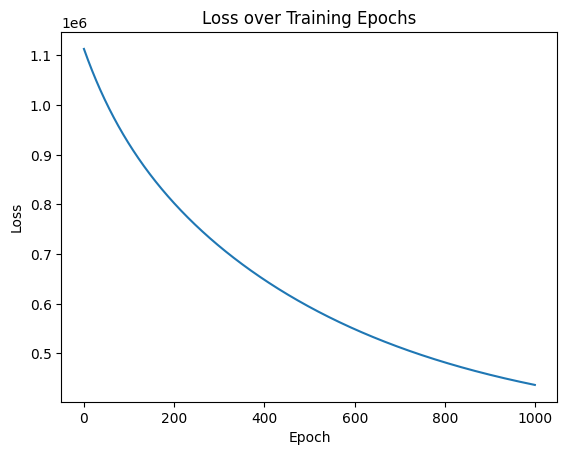

In [202]:
plt.plot(range(timesteps), loss_example)
plt.title("Loss over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Insight & Policy Decision